<a href="https://colab.research.google.com/github/phanr1/Heart_attack_project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import plotly.express as px
import numpy as np
import scipy

In [ ]:
#Import data
path = os.path.join(os.getcwd(), 'data', 'train.csv')
data = pd.read_csv(path, header=0)

<font size="15">Data Cleaning</font>

In [ ]:
# Check the data
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Drop the ID column
df = data.drop(['id'], axis=1)

In [ ]:
# Get shape of the data. Might be necessary for PCA later
m, n = df.shape
print('m: {}, n: {}'.format(m,n))

m: 3390, n: 16


In [ ]:
# Convert 'is_smoking' and 'sex' to binary (0 = male, 1 = female)
df['is_smoking'] = pd.Series(np.where(df['is_smoking'].values == 'YES', 1, 0),
          df.index)
df['sex'] = pd.Series(np.where(df['sex'].values == 'F', 1, 0),
          df.index)

In [ ]:
# Check that the changes happened...
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Find all the NaN in each column
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# see if certain columns should be replaced with median or mean. 
# Show column statistics for each variable for the males
df[df['sex'] == 0].describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1467.000000,1422.000000,1467.0,1467.000000,1455.000000,1456.000000,1467.000000,1467.000000,1467.000000,1464.000000,1467.000000,1467.000000,1462.000000,1466.000000,1376.000000,1467.000000
mean,49.130198,2.006329,0.0,0.620995,13.593814,0.021291,0.005453,0.316973,0.027267,233.431011,131.647580,83.692911,26.205534,74.349932,81.880814,0.185412
std,8.587887,1.090211,0.0,0.485305,13.693364,0.144403,0.073670,0.465456,0.162915,43.049297,19.719301,11.531643,3.433138,11.760682,23.961795,0.388764
min,33.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,16.980000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,118.000000,75.750000,23.970000,66.000000,70.000000,0.000000
50%,48.000000,2.000000,0.0,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,231.000000,129.000000,82.000000,26.100000,74.500000,78.000000,0.000000
75%,56.000000,3.000000,0.0,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,260.000000,141.000000,90.000000,28.350000,80.000000,87.000000,0.000000
max,69.000000,4.000000,0.0,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,235.000000,136.000000,40.380000,125.000000,394.000000,1.000000


In [ ]:
# Fill the NaNs with their gender-specific column avererages
for i in range(2):
    df_sex = df['sex'] == i
    for col in ['cigsPerDay', 'BPMeds', 'heartRate', 'BMI', 'totChol', 'glucose', 'education']:
        avg=df[df_sex][col].mean()
        df.loc[df_sex, col]=df.loc[df_sex, col].fillna(avg)

In [ ]:
# Check that indeed all of the NaNs have been filled
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# Split dataframe into X matrix of predictors and y response vector for plotting
y = df['TenYearCHD']
X = df.drop(['TenYearCHD', 'education'], axis=1)    # Drop education here until needed later
X_eduction = df.drop('TenYearCHD', axis=1)
X0 = X.copy()

In [ ]:
# Check that our matrix/vector is correct 
display(X.head())
display(y.head())

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.481353,90.0,80.0
1,36,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0


0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

<font size="15">EDA</font>

In [ ]:
# Plot the number of TenYearCHD
fig = px.histogram(df, x ='TenYearCHD', color='TenYearCHD', barmode = 'group', width=500, height=400, title='Proportion of TenYearCHD', color_discrete_map = {0:'blue',1:'red'})

fig.show()

In [ ]:
#plot the number of females to males.
fig = px.histogram(df, x ='sex', color='sex', barmode = 'group', width=500, height=400, title='Number of Females to Males', color_discrete_map = {0:'blue',1:'red'})

fig.show()

There are more females(1923) than males(1467) in the dataset. 

In [ ]:
fig = px.histogram(df, x ='TenYearCHD',color='sex' , barmode = 'group', width=500, height=400, title='Heart Attack Chance by Sex', color_discrete_map = {0:'blue',1:'red'})
fig.show()

In [ ]:

fig = px.histogram(df, x ='age', color='TenYearCHD' , barmode = 'group', width=500, height=400, title='CHD by Age', color_discrete_map = {0:'blue',1:'red'})
fig.show()

Men are more prone to heart attacks, even with the disproportionate amount of females to males.  

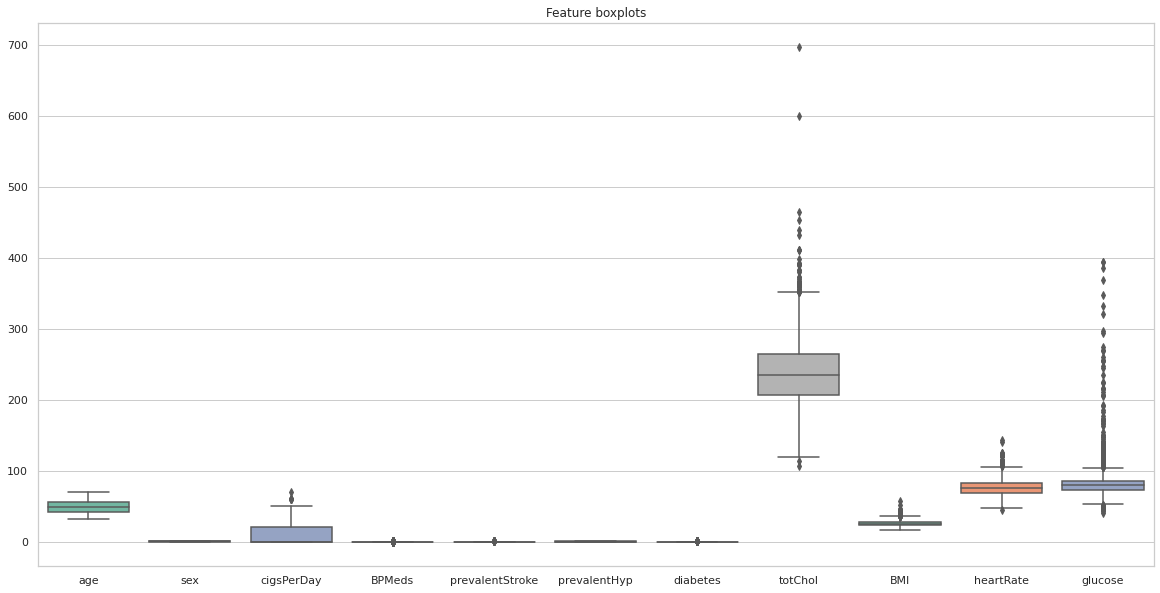

In [ ]:
# Plot to see if there are any outliers. 
#X.boxplot(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(ax=ax, data=X, orient='v', palette='Set2')
plt.title('Feature boxplots')
plt.savefig('feat_box.png')

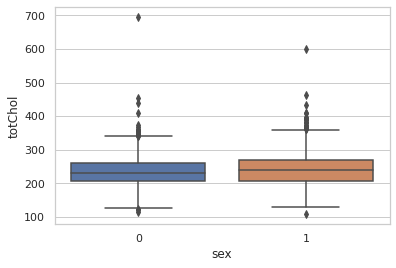

In [ ]:

sns.set_theme(style='whitegrid')
sns.boxplot(x=X['sex'], y=X['totChol'])

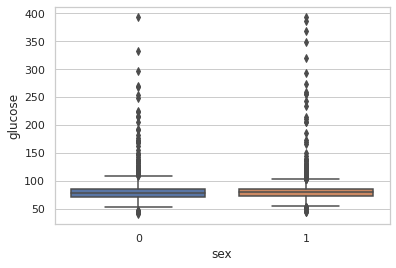

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(x=X['sex'], y=X['glucose'])

There seems to be some possible outliers in toChol and glucose. When plotting the features individually and by breaking them up to see if the outliers varies by sex. As you can see it seems that there are possible outliers. When we look at how poorly our model is performing below, it seems removing outliers may be the right choice. 


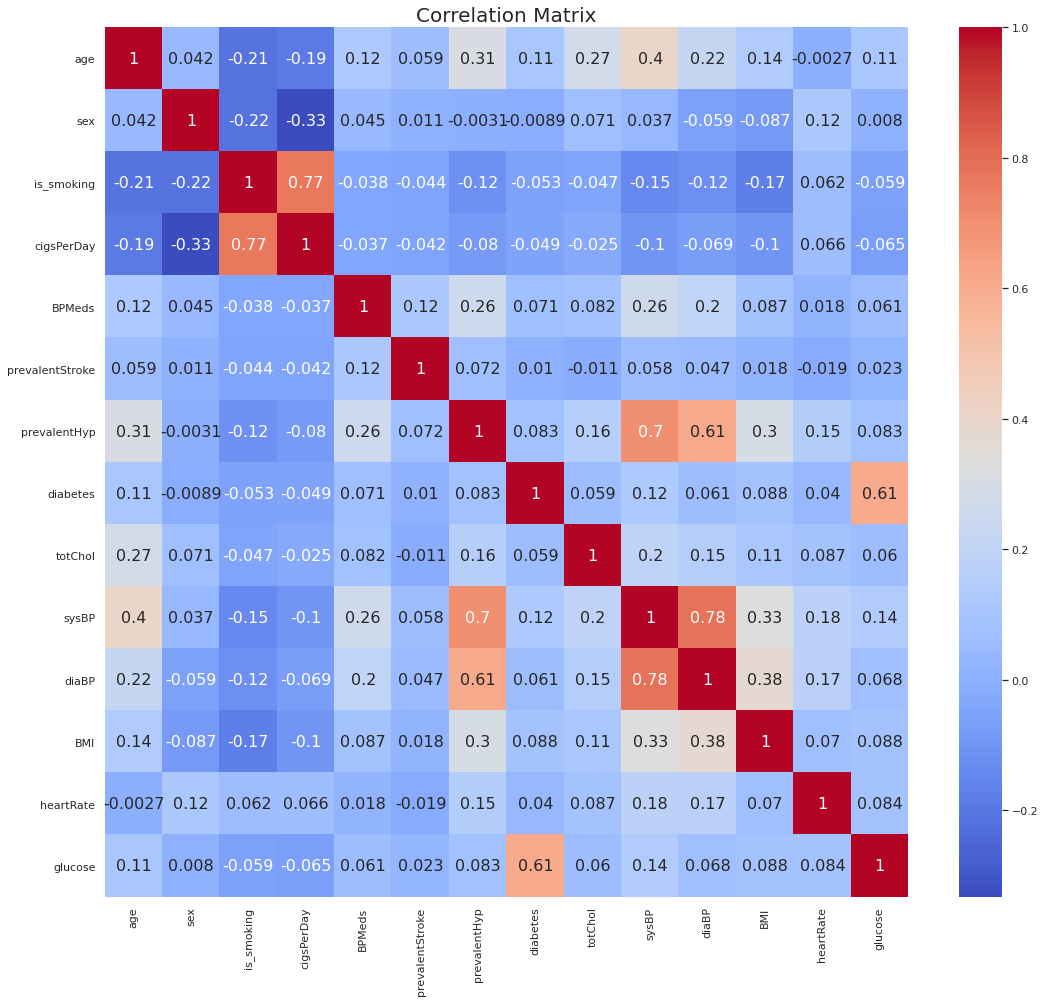

In [ ]:
#See if there are high correlation between variables and wether we can drop any.  
f,ax = plt.subplots(figsize=(18,16))
sns.heatmap(X.corr(), cmap = 'coolwarm', annot = True, annot_kws={'size': 16}, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 20)
plt.show()
    

There is a high correlation between prevalentHyp and sysBP and diBP. Makes sense since blood pressure effects wether a person has hypertension. We can remove sysBP and diaBP since they are indicators of the same thing. Also diabetes is strongly correlated with glucose levels which makes sense, since high glucose can cause diabetes. But we will use 0.7 as the threshold for this data so we will not remove any of those variables. CigsPerDay and is_smoking is also highly correlated, so we will remove one of those variables.  

In [ ]:
df_dropped = df.drop(['sysBP', 'diaBP', 'is_smoking'], axis=1)
display(df_dropped.head())
sample = df_dropped.head()
sample.to_csv('sampledata.csv')

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,3.0,0.0,0,0,0,221.0,25.481353,90.0,80.0,1
1,36,4.0,0,0.0,0.0,0,1,0,212.0,29.770000,72.0,75.0,0
2,46,1.0,1,10.0,0.0,0,0,0,250.0,20.350000,88.0,94.0,0
3,50,1.0,0,20.0,0.0,0,1,0,233.0,28.260000,68.0,94.0,1
4,64,1.0,1,30.0,0.0,0,0,0,241.0,26.420000,70.0,77.0,0


We will also now remove the outliers from the df_dropped.

In [ ]:
#function called outliers that will return a list of index of outliers
def outlier(d, ft):
  Q1 = d[ft].quantile(0.25)
  Q3 = d[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR

  upper_bound = Q3 + 1.5 * IQR

  ls = d.index[ (d[ft] < int(lower_bound)) | (d[ft] > int(upper_bound))]

  return ls


In [ ]:
#create an empty list to store the output indices from multiple columns
#index_list = []
#coded like this so you can add glucose to see the difference. 
#for feature in ['totChol', 'glucose']:
  #index_list.extend(outlier(df_dropped, feature))

In [ ]:
#index_list

In [ ]:
#define function to remove outliers

def remove(d, ls):
  ls = sorted(set(ls))
  d = d.drop(ls)
  return d

In [ ]:
#print('Old data:', df_dropped.shape)
#df_dropped = remove(df_dropped, index_list)
#print('New data:', df_dropped.shape)

I attempted to remove outliers with the previous code. It actully made the models performs worse using our metrics. This may show that the points are valuable and should not be removed, probably due to not having much data. You will notice that it is not just 1 or 2 points that are seen as outliers on the previous box plot, but a good portion of them and they seem to be evenly spread amount amongst themselves. So we will not remove the data. Just to give us more input about the features and data, I was curious to see which outliers for totChol belonged to the 0 or 1 class of TenYearCHD. I will also do the same for glucose.

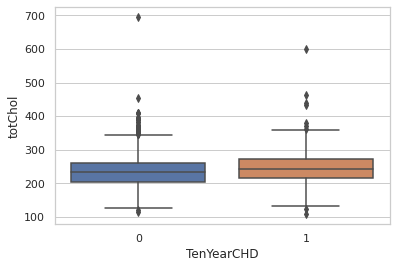

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['TenYearCHD'], y=df['totChol'])
plt.savefig('totChol_box.png')

In [ ]:
fig = px.histogram(df, x ='totChol',color='TenYearCHD' , barmode = 'group', width=500, height=400, title='Heart Attack Chance by totChol', color_discrete_map = {0:'blue',1:'red'})
fig.show()

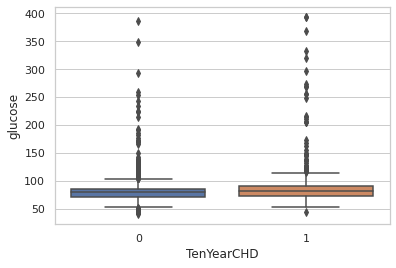

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['TenYearCHD'], y=df['glucose'])
plt.savefig('glucose_box.png')

In [ ]:
fig = px.histogram(df, x ='glucose',color='TenYearCHD' , barmode = 'group', width=700, height=400, title='Heart Attack Chance by glucose', color_discrete_map = {0:'blue',1:'red'})
fig.show()

Interestingly enough, it seems like cholesterol and glucose are in the same range for for each classification of CHD and have similiar quartiles and centers. I did not expect the range to be different because the human body runs in a tight range (or else death), but I expected the centers and quartiles to be more noticably different, but am not sure how different they should be. The farthest outlier for totChol is around 700, which is for someone who is not at risk for ten year CHD. It is generally thought that high cholesterol and glucose put a person at risk for CHD, but since we have such a high sample for CHD = 0, we may see more spread out values. You will also notice the distribution is very similiar between CHD and nonCHD and centered at the same range. I am going to try this for some of the other features to see if there is much of a difference for the range for each classification. This may show why our classification is not performing at the rate we expect. There may be not much difference in value between the features and their classsifications.  


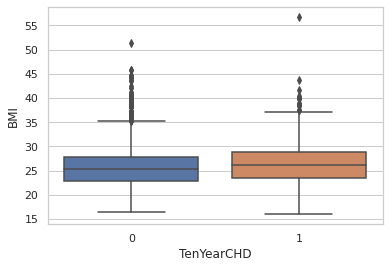

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['TenYearCHD'], y=df['BMI'])

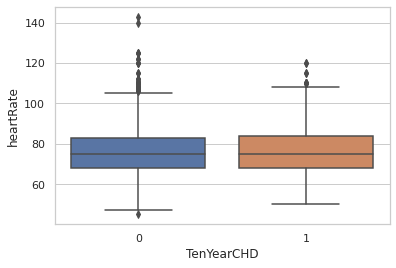

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['TenYearCHD'], y=df['heartRate'])

You can see similiar boxplots for the other features. We are able to still get decently performing models with certain parameters, but these insights should be taken into consideration when drawing our conclusions. There also is a major data imbalance if you look at the dataset divided by classification above. There are way more 0 CHD classifications than 1 CHD classification. Since there is such a large sample of 0 CHD and such a small sample for 1 CHD, it may effect our ending result. This also gets me thinking about how these people were classified for being at risk for CHD. They could of just been diagnosis from different physicians, making the classification subjective. 

<font size="15">Models</font>

In [ ]:
# Import Models for testing and comparisson
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import plot_confusion_matrix, classification_report

We should consider the effects of misclassification when it comes to this data. False negatives should carry a larger weight than false positives. I am not sure how to adjust the models that do not provide a probability for this (KNN) but we can seek to optimize some models to minimize false negatives. Or, we can just comment on which models provided more false negatives and then explain why that is a very bad thing in our case.

In [ ]:
# Split dataframe into X matrix of predictors and y response vector from the dropped data frame
y = df_dropped['TenYearCHD']
X = df_dropped.drop(['TenYearCHD', 'education'], axis=1)    # Drop education here until needed later
X_eduction = df.drop('TenYearCHD', axis=1)

First we should scale the data so that each variable is on the same order. This will help with some model fitting. We can always scale back when necessary using the parameters stored in the scaler object

In [ ]:
# Generate the scaler and transform the data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
display(X_scaled.head())

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose
0,1.682783,0.873425,-0.512980,-0.176884,-0.080821,-0.678658,-0.162295,-0.357883,-0.076316,1.171689,-0.090425
1,-1.576210,-1.144919,-0.766288,-0.176884,-0.080821,1.473495,-0.162295,-0.557939,0.968066,-0.332276,-0.306609
2,-0.412284,0.873425,0.078075,-0.176884,-0.080821,-0.678658,-0.162295,0.286742,-1.325916,1.004581,0.514890
3,0.053287,-1.144919,0.922438,-0.176884,-0.080821,1.473495,-0.162295,-0.091142,0.600347,-0.666490,0.514890
4,1.682783,0.873425,1.766801,-0.176884,-0.080821,-0.678658,-0.162295,0.086686,0.152266,-0.499383,-0.220136


In [ ]:
# Split data using X_scaled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42, shuffle=True)   # Answer to life? 

First we will fit a number of models using the resulting predictor data set which we arrived at in the last section. 

We will attempt to optimize hyperparameters for each model using 5-fold cross-validation whereever possible. 

In [ ]:
# Create a data frame to store the results in
results = pd.DataFrame(columns = ['Model', 'Train Score', 'Test Score', 'Pos Precision', 'Pos Recall'])

KNN
Best parameters: {'n_neighbors': 8}
Train CV score: 0.8451346557664472
Test Score: 0.8480825958702065


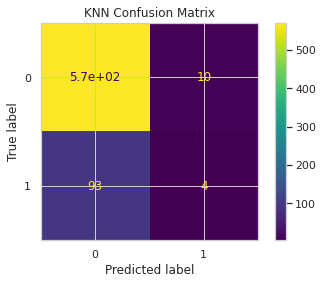

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       581
           1       0.29      0.04      0.07        97

    accuracy                           0.85       678
   macro avg       0.57      0.51      0.49       678
weighted avg       0.78      0.85      0.80       678



In [ ]:
# KNN
print('KNN')

# Define the model and fit it
n_neighbors = [*range(1,10)]
params = {'n_neighbors': n_neighbors}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_knn.best_score_
print('Best parameters: {}'.format(clf_knn.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_knn.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_knn, X_test, y_test)
plt.title('KNN Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_knn.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_knn.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'KNN', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

Naive Bayes
Train score: 0.8296460176991151
Test Score: 0.8451327433628318


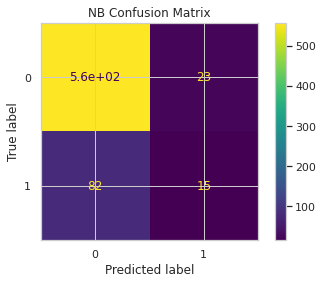

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       581
           1       0.39      0.15      0.22        97

    accuracy                           0.85       678
   macro avg       0.63      0.56      0.57       678
weighted avg       0.80      0.85      0.82       678



In [ ]:
# Naive Bayes
print('Naive Bayes')

# Define the model and fit it, no CV
clf_NB = GaussianNB().fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_NB.score(X_train,y_train)
print('Train score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_NB.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_NB, X_test, y_test)
plt.title('NB Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_NB.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_NB.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'NB', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

SVC-Linear
Best parameters: {'C': 0.0001, 'gamma': 0.0001}
Train CV score: 0.8473452800826351
Test Score: 0.8569321533923304


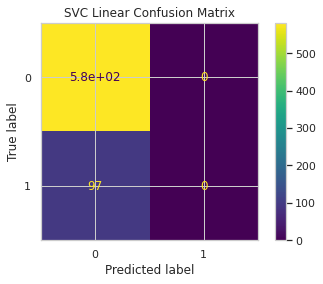

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       0.00      0.00      0.00        97

    accuracy                           0.86       678
   macro avg       0.43      0.50      0.46       678
weighted avg       0.73      0.86      0.79       678



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# SVC w/ Linear Kernel
print('SVC-Linear')

# Define the model and fit it
params = {'C': [0.0001,0.001,0.01,0.1,1,10], 'gamma': [0.0001,0.001,0.01,0.1,1]}
svc_lin = SVC(kernel = 'linear')
clf_svc_lin = GridSearchCV(svc_lin, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_svc_lin.best_score_
print('Best parameters: {}'.format(clf_svc_lin.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_svc_lin.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_svc_lin, X_test, y_test)
plt.title('SVC Linear Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_svc_lin.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_svc_lin.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'SVC_Lin', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

All FN and no TP, or FP. This is not a good model.

SVC-Radial
Best parameters: {'C': 10, 'gamma': 0.01}
Train CV score: 0.8495586226580498
Test Score: 0.855457227138643


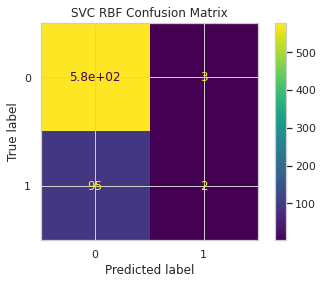

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.40      0.02      0.04        97

    accuracy                           0.86       678
   macro avg       0.63      0.51      0.48       678
weighted avg       0.79      0.86      0.80       678



In [ ]:
# SVC w/ Radial Kernel
print('SVC-Radial')

# Define the model and fit it
params = {'C': [0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.0001,0.001,0.01,0.1,1]}
svc_rbf = SVC(kernel = 'rbf')
clf_svc_rbf = GridSearchCV(svc_rbf, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_svc_rbf.best_score_
print('Best parameters: {}'.format(clf_svc_rbf.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_svc_rbf.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_svc_rbf, X_test, y_test)
plt.title('SVC RBF Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_svc_rbf.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_svc_rbf.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'SVC_RBF', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

All FN and no TP, or FP. This is not a good model.

Logistic Regression
Best parameters: {'C': 10}
Train CV score: 0.8532459412991921
Test Score: 0.8584070796460177


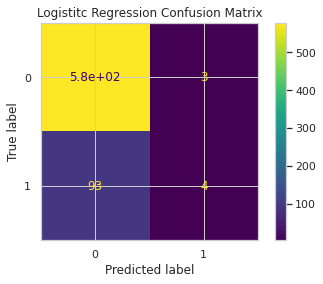

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.57      0.04      0.08        97

    accuracy                           0.86       678
   macro avg       0.72      0.52      0.50       678
weighted avg       0.82      0.86      0.80       678



In [ ]:
# Logistic Regression
print('Logistic Regression')

# Define the model and fit it
params = {'C': [0.0001,0.001,0.01,0.1,1,10,100]}
log = LogisticRegression()
clf_log = GridSearchCV(log, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_log.best_score_
print('Best parameters: {}'.format(clf_log.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_log.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_log, X_test, y_test)
plt.title('Logistitc Regression Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_log.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_log.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'Log', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

Logistic Regression could use a bit of work here to optimize the threshold using penalties and other things like precision/recall. Currently the built in `predict` function uses a threshold of 0.5. We should be able to use `predict_proba` to change this. 

CART
Train score: 1.0
Test Score: 0.7654867256637168


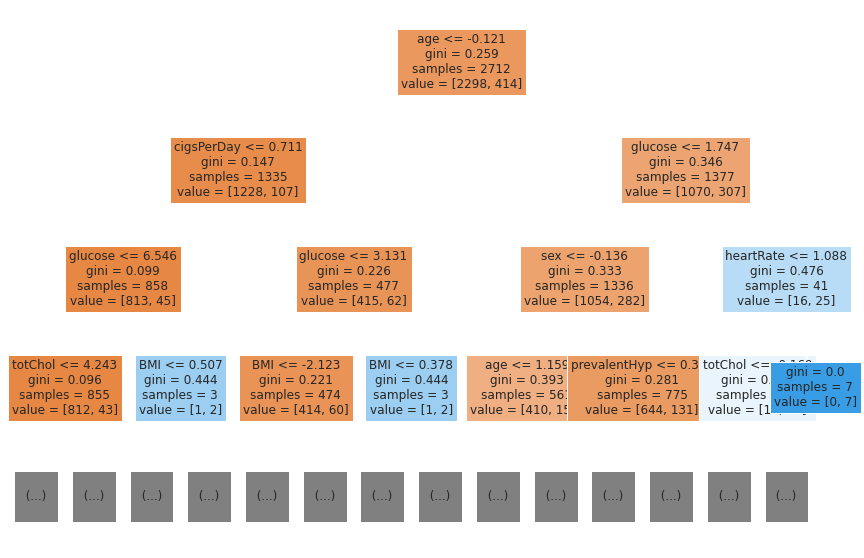

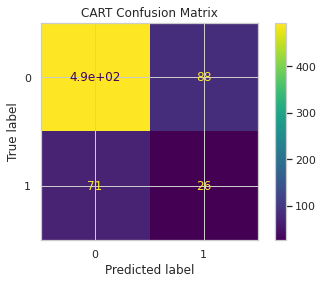

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       581
           1       0.23      0.27      0.25        97

    accuracy                           0.77       678
   macro avg       0.55      0.56      0.55       678
weighted avg       0.78      0.77      0.77       678



In [ ]:
# CART
print('CART')

# Define the model and fit it
clf_cart = DecisionTreeClassifier().fit(X_train, y_train)

# Display the resulting tree
plt.figure(figsize=(15,10))
plot_tree(clf_cart, max_depth=3, filled=True, fontsize=12, feature_names=X_scaled.columns)

# Display the results of the model fitting
train_score = clf_cart.score(X_train, y_train)
# print('Best parameters: {}'.format(clf_cart.best_params_))
print('Train score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_cart.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_cart, X_test, y_test)
plt.title('CART Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_cart.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_cart.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'CART', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

This brings up an interesting fact about scaling the data. Unscaled data would have a greater impact when it comes to trees as it would allow for easier interpretation of the plotted tree.

Random Forest
Best parameters: {'n_estimators': 70}
Train CV score: 0.8484556889767794
Test Score: 0.8421828908554573


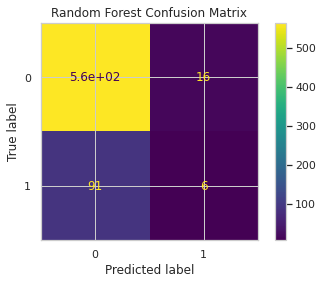

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       581
           1       0.27      0.06      0.10        97

    accuracy                           0.84       678
   macro avg       0.57      0.52      0.51       678
weighted avg       0.78      0.84      0.80       678



In [ ]:
# Random Forest
print('Random Forest')

# Define the model and fit it
params = {'n_estimators': [*range(1,100)]}
rf = RandomForestClassifier()
clf_RF = GridSearchCV(rf, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_RF.best_score_
print('Best parameters: {}'.format(clf_RF.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_RF.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_RF, X_test, y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_RF.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_RF.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'RF', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

The best `n_estimators` was chosen using the baked in score of `GridSearchCV` which means it likely just uses the best accuracy. I think that is fine in this case since we are looking for classificaiton and not regression (which with regression we might seek minimize SSE). 

Neural Network
Train score: 0.8639380530973452
Test Score: 0.8480825958702065


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



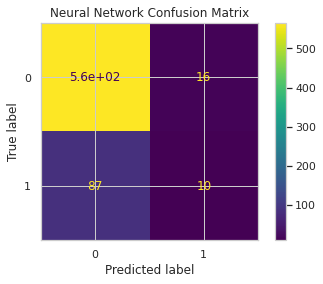

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       581
           1       0.38      0.10      0.16        97

    accuracy                           0.85       678
   macro avg       0.63      0.54      0.54       678
weighted avg       0.80      0.85      0.81       678



In [ ]:
# Neural Network
print('Neural Network')

# Define the model and fit it
# params = {'n_estimators': [*range(1,100)]}
clf_NN = MLPClassifier().fit(X_train, y_train)
# clf_NN = GridSearchCV(nn, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_NN.score(X_train, y_train)
# print('Best parameters: {}'.format(clf_NN.best_params_))
print('Train score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_NN.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_NN, X_test, y_test)
plt.title('Neural Network Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_NN.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_NN.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'NN', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

AdaBoost
Best parameters: {'n_estimators': 5}
Train CV score: 0.8517712856686577
Test Score: 0.859882005899705


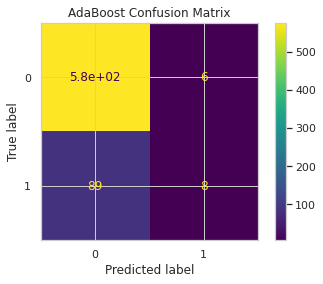

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       581
           1       0.57      0.08      0.14        97

    accuracy                           0.86       678
   macro avg       0.72      0.54      0.53       678
weighted avg       0.82      0.86      0.81       678



In [ ]:
# AdaBoost
print('AdaBoost')

# Define the model and fit it
params = {'n_estimators': [*range(1,100)]}
ada = AdaBoostClassifier()
clf_ada = GridSearchCV(ada, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_ada.best_score_
print('Best parameters: {}'.format(clf_ada.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_ada.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_ada, X_test, y_test)
plt.title('AdaBoost Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_ada.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_ada.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'Ada', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

In [ ]:
# Display the final results for each classifier
display(results)

,Model,Train Score,Test Score,Pos Precision,Pos Recall
0,KNN,0.845135,0.848083,0.285714,0.041237
1,NB,0.829646,0.845133,0.394737,0.154639
2,SVC_Lin,0.847345,0.856932,0.000000,0.000000
3,SVC_RBF,0.849559,0.855457,0.400000,0.020619
4,Log,0.853246,0.858407,0.571429,0.041237
5,CART,1.000000,0.765487,0.228070,0.268041
6,RF,0.848456,0.842183,0.272727,0.061856
7,NN,0.863938,0.848083,0.384615,0.103093
8,Ada,0.851771,0.859882,0.571429,0.082474



---
# Dimensionality Reduction

We should investigate the effectiveness of dimensionality reduction using Principal Component Analysis. For this we will use the original dataset before any variables were dropped. We will use the same random state for the split in order to ensure we grab the same data points for the test data. 

In [ ]:
# Import the necessary modules
from sklearn.decomposition import PCA

In [ ]:
# Split dataframe into X matrix of predictors and y response vector from the dropped data frame
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)

# Generate the scaler and transform the data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
display(X_scaled.head())

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.682783,0.028760,0.873425,1.004731,-0.512980,-0.176884,-0.080821,-0.678658,-0.162295,-0.357883,0.690879,0.176093,-0.076316,1.171689,-0.090425
1,-1.576210,2.017268,-1.144919,-0.995291,-0.766288,-0.176884,-0.080821,1.473495,-0.162295,-0.557939,1.588193,1.257462,0.968066,-0.332276,-0.306609
2,-0.412284,-0.965494,0.873425,1.004731,0.078075,-0.176884,-0.080821,-0.678658,-0.162295,0.286742,-0.744824,-0.988457,-1.325916,1.004581,0.514890
3,0.053287,-0.965494,-1.144919,1.004731,0.922438,-0.176884,-0.080821,1.473495,-0.162295,-0.091142,1.139536,0.425640,0.600347,-0.666490,0.514890
4,1.682783,-0.965494,0.873425,1.004731,1.766801,-0.176884,-0.080821,-0.678658,-0.162295,0.086686,0.174923,0.176093,0.152266,-0.499383,-0.220136


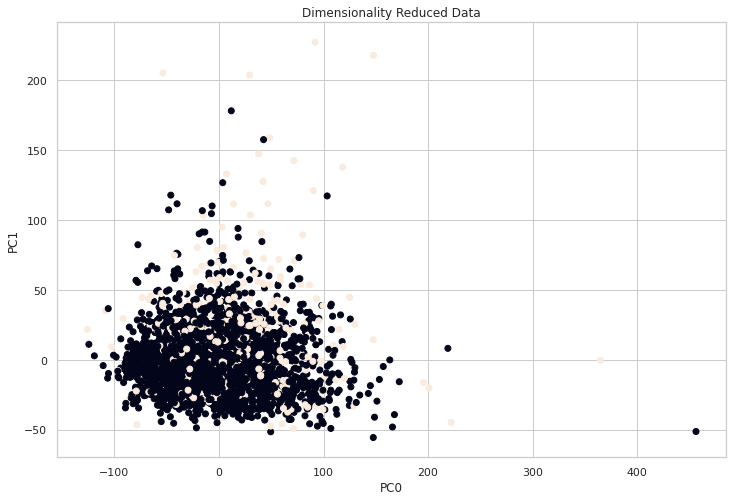

In [ ]:
# Perform the dimensonilty reduction on the X predictors
n_components = 7
pca = PCA(n_components = n_components).fit(X)
X_transformed = pca.transform(X)

# Plot the resulting points
plt.figure(figsize=(12,8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = y)
plt.title('Dimensionality Reduced Data')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

Performing PCA on the data does not appear that it will help improve classification as there appears to be no geometric distinction between the two classes. 

In [ ]:
for i in range(2):
    print('PC {}:'.format(i))
    print('Explained Variance Ratio: {}'.format(pca.explained_variance_ratio_[i]))
    for name, val in zip(X.columns, pca.components_[i]):
        if name == 'prevalentStroke':
            print('{}  {}'.format(name, val))
        elif len(name) >= 7:
            print('{} \t {}'.format(name, val))
        else: 
            print('{} \t\t {}'.format(name, val))
    print('\n')

PC 0:
Explained Variance Ratio: 0.5783029731898988
age 		 0.05874123690123483
education 	 -0.0007356390960385761
sex 		 0.0007993392037921191
is_smoking 	 -0.0006903885071014096
cigsPerDay 	 -0.009962639006654728
BPMeds 		 0.00038615298398369787
prevalentStroke  -8.341564438089184e-06
prevalentHyp 	 0.0022389093863447868
diabetes 	 0.00029127222529955546
totChol 	 0.9850139419467663
sysBP 		 0.13876867702122292
diaBP 		 0.059452742337008396
BMI 		 0.013082163738478744
heartRate 	 0.028805615466959422
glucose 	 0.04897512445023479


PC 1:
Explained Variance Ratio: 0.1751583359288418
age 		 0.10900937941941852
education 	 -0.004797588144057674
sex 		 0.0003048007706044635
is_smoking 	 -0.003202431557815051
cigsPerDay 	 -0.06574778943031741
BPMeds 		 0.0014439958880545823
prevalentStroke  0.0001992360384177325
prevalentHyp 	 0.010424418078578496
diabetes 	 0.00255597133295217
totChol 	 -0.15939010046655577
sysBP 		 0.7144878390297668
diaBP 		 0.31963115175006085
BMI 		 0.04984575345088155

Not sure if I understand eigenvectors well enough, but I believe we can observe how much weight the PCA is putting on each of the predictor variables when constructing each of the components. For the first PC it appears that the majority of the weight is on `totChol`. For the second PC it appears that the weight is more spread across a multiple predictors (`age`, `sysBP`, `diaBP`, `glucose`). I'm not sure if we can gain anything from this analysis. 

Together the two components account for $\sim75\%$ of the total variance in the data.

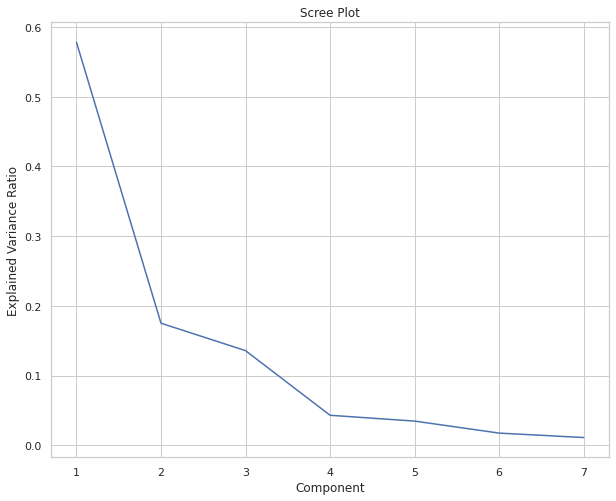

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

However, from the scree plot above an argument could be made to maintain the first 4 components as this is where the explained variance levels off.

To test this, I will take the first 4 components and fit an AdaBoost model to them as this model marginally yielded the best test accuracy from the models section.

In [ ]:
# Split data using X_transformed 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed[:,:4], y, test_size = 0.2, random_state=42, shuffle=True)   # Answer to life? 

PCA AdaBoost
Best parameters: {'n_estimators': 1}
Train CV score: 0.8473452800826351
Test Score: 0.8569321533923304


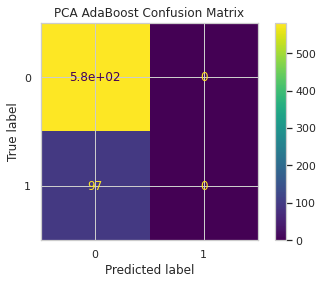

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       0.00      0.00      0.00        97

    accuracy                           0.86       678
   macro avg       0.43      0.50      0.46       678
weighted avg       0.73      0.86      0.79       678



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# PCA AdaBoost
print('PCA AdaBoost')

# Define the model and fit it
params = {'n_estimators': [*range(1,100)]}
pca_ada = AdaBoostClassifier()
clf_pca_ada = GridSearchCV(pca_ada, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_pca_ada.best_score_
print('Best parameters: {}'.format(clf_pca_ada.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_pca_ada.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_pca_ada, X_test, y_test)
plt.title('PCA AdaBoost Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_pca_ada.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_pca_ada.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'PCA Ada', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

The resulting accuracy of the model is no better than when we maintained all of the predictors. In fact, I would argue that it is worse now that every single positive case is a false negative which could be disasterous in the medical setting. But we should be concerned with the fact that the cross-validation search for optimal hyperparameters found the best number of estimators to be 1. This means a single decision stump. 

For completeness, we will fit an AdaBoost model with the default 50 decision stumps and observe its effectiveness.

PCA AdaBoost n=50
Train CV score: 0.8536135693215339
Test Score: 0.859882005899705


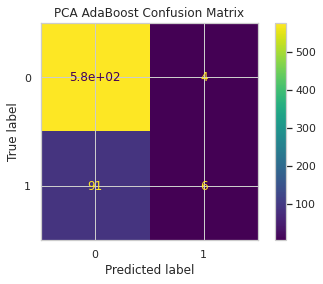

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.60      0.06      0.11        97

    accuracy                           0.86       678
   macro avg       0.73      0.53      0.52       678
weighted avg       0.83      0.86      0.81       678



In [ ]:
# PCA AdaBoost n=50
print('PCA AdaBoost n=50')

# Define the model and fit it
# params = {'n_estimators': [*range(1,100)]}
clf_pca_ada_50 = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
# clf_pca_ada_50 = GridSearchCV(pca_ada_50, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_pca_ada_50.score(X_train, y_train)
# print('Best parameters: {}'.format(clf_pca_ada_50.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_pca_ada_50.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_pca_ada_50, X_test, y_test)
plt.title('PCA AdaBoost Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_pca_ada_50.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_pca_ada_50.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'PCA Ada 50', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

The resulting accuracy is nearly the same as our original AdaBoost on all of the predictors.

Lastly, just for fun, let's fit a Neural Network to the reduced data as it should be the best classifier.

PCA Neural Network
Train score: 0.8506637168141593
Test Score: 0.855457227138643


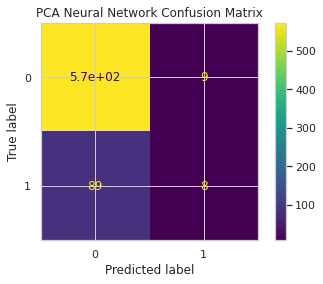

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       581
           1       0.47      0.08      0.14        97

    accuracy                           0.86       678
   macro avg       0.67      0.53      0.53       678
weighted avg       0.81      0.86      0.81       678



In [ ]:
# Neural Network PCA
print('PCA Neural Network')

# Define the model and fit it
# params = {'n_estimators': [*range(1,100)]}
clf_NN_pca = MLPClassifier().fit(X_train, y_train)
# clf_NN_pca = GridSearchCV(nn, params).fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_NN_pca.score(X_train, y_train)
# print('Best parameters: {}'.format(clf_NN_pca.best_params_))
print('Train score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_NN_pca.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_NN_pca, X_test, y_test)
plt.title('PCA Neural Network Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_NN_pca.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_NN_pca.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
results = results.append({'Model': 'PCA NN', 'Train Score': train_score, 'Test Score': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

Effectively the same results as the original Neural Network fit.

In [ ]:
display(results)
results.to_csv('model_results.csv')

,Model,Train Score,Test Score,Pos Precision,Pos Recall
0,KNN,0.845135,0.848083,0.285714,0.041237
1,NB,0.829646,0.845133,0.394737,0.154639
2,SVC_Lin,0.847345,0.856932,0.000000,0.000000
3,SVC_RBF,0.849559,0.855457,0.400000,0.020619
4,Log,0.853246,0.858407,0.571429,0.041237
5,CART,1.000000,0.765487,0.228070,0.268041
6,RF,0.848456,0.842183,0.272727,0.061856
7,NN,0.863938,0.848083,0.384615,0.103093
8,Ada,0.851771,0.859882,0.571429,0.082474
9,PCA Ada,0.847345,0.856932,0.000000,0.000000


# Addressing the Impact of FNs

The impact of FNs can be very large in a medical setting. This could lead to medical professionals missing a critical diagnosis of a potentially fatal condition. It is important for us to understand that in our analysis and optimize our models to penalize FNs heavily. 

One way that we can do this is via logistic regression and adjusting the threshold to reduce FNs as much as possible. Furthermore, if we can obtain the predicted probabilities for each data point from any model that allows it and adjust the threshold, we can adjust our threshold to optimize each model to obtain the best results. 

Another option is to play with the penalty parameter for a SVC model to find the optimal C that gives us the best results.

We will focus initially on high recall scores as having the greatest success due to the importance of classifying actual positives correctly. 

What is nice is that we can conduct most of the optimization that we conducted in the models section by maximizing the recall score more than the precision by setting the `scoring` method in `GridSeachCV` to be `'recall'`. 

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve, plot_precision_recall_curve

In [ ]:
# Split dataframe into X matrix of predictors and y response vector from the dropped data frame
y = df_dropped['TenYearCHD']
X = df_dropped.drop(['TenYearCHD', 'education'], axis=1)    # Drop education here until needed later
X_eduction = df.drop('TenYearCHD', axis=1)

# Generate the scaler and transform the data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

# Split data using X_scaled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42, shuffle=True)   # Answer to life? 

In [ ]:
# Create a data frame to store the results in
recall_results = pd.DataFrame(columns = ['Model', 'Train Recall', 'Test Recall', 'Pos Precision', 'Pos Recall'])

---

## KNN

KNN
Best parameters: {'n_neighbors': 1}
Train CV score: 0.19541580957978252
Test Score: 0.23711340206185566


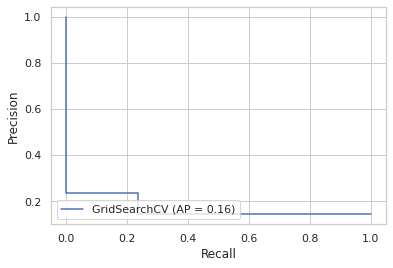

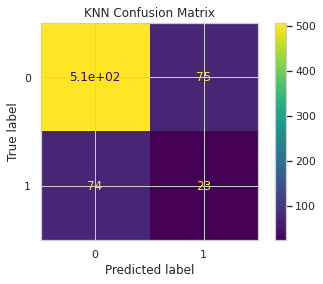

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       581
           1       0.23      0.24      0.24        97

    accuracy                           0.78       678
   macro avg       0.55      0.55      0.55       678
weighted avg       0.78      0.78      0.78       678



In [ ]:
# KNN
print('KNN')

# Define the model and fit it
n_neighbors = [*range(1,20)]
params = {'n_neighbors': n_neighbors}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, params, scoring='recall').fit(X_train, y_train)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_knn, X_test, y_test)

# Display the results of the model fitting
train_score = clf_knn.best_score_
print('Best parameters: {}'.format(clf_knn.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_knn.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_knn, X_test, y_test)
plt.title('KNN Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_knn.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_knn.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'KNN', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

KNN takes an optimimum number of neighbors to be 1 which ups the recall score, but reduces our overall precision. The problem with one neighbor is that the resulting probability for each point will be either $0\%$ or $100\%$ which doesn't allow us to adjust the threshold on the back end. For the sake of optimizing the threshold for KNN, let's set n equal to 10 neighbors and then seek to optimize the threshold. 

KNN 10 neighbors
Train CV score: 0.0748792270531401
Test Score: 0.030927835051546393


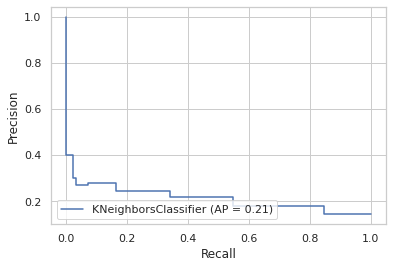

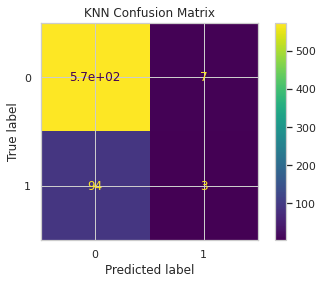

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.30      0.03      0.06        97

    accuracy                           0.85       678
   macro avg       0.58      0.51      0.49       678
weighted avg       0.78      0.85      0.80       678



In [ ]:
# KNN 10
print('KNN 10 neighbors')

# Define the model and fit it
clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_knn, X_test, y_test)

# Display the results of the model fitting
train_score = recall_score(y_train, clf_knn.predict(X_train))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = recall_score(y_test, clf_knn.predict(X_test))
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_knn, X_test, y_test)
plt.title('KNN Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_knn.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_knn.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'KNN 10', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

Unfortunately this plot shows us that there is not a good tradeoff when it comes to precession vs. recall. If you want high recall, or a low FN rate, you suffer greatly when it comes to precssion. It would be up to the medical professional or the medial community to decide what an acceptable precssion would be in order to boost recall

---

## Naive Bayes

Naive Bayes
Train score: 0.14009661835748793
Test Score: 0.15463917525773196


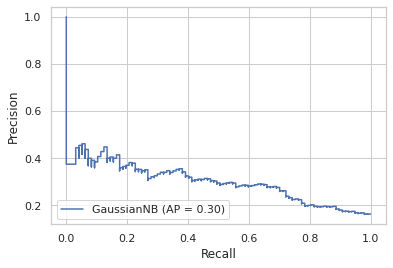

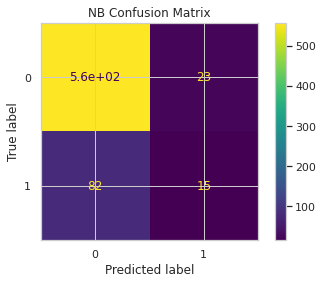

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       581
           1       0.39      0.15      0.22        97

    accuracy                           0.85       678
   macro avg       0.63      0.56      0.57       678
weighted avg       0.80      0.85      0.82       678



In [ ]:
# Naive Bayes
print('Naive Bayes')

# Define the model and fit it, no CV
clf_NB = GaussianNB().fit(X_train, y_train)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_NB, X_test, y_test)

# Display the results of the model fitting
train_score = recall_score(y_train, clf_NB.predict(X_train))
print('Train score: {}'.format(train_score))

# Test the model on the test data
test_score = recall_score(y_test, clf_NB.predict(X_test))
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_NB, X_test, y_test)
plt.title('NB Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_NB.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_NB.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'NB', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

Naive Bayes proves to have better results when it comes to the precssion and recall tradeoff. If you would like to increase your recall you can maintain more precssion, which is also evident in the average precission (AP) score of $0.3$, which is $0.9$ greater than the AP for the KNN ($n=10$) model. 

---
## SVC - RBF

This model should be better when it comes to optimizing because we have the freedom to choose our C parameter, which acts as a penalty parameter.

SVC-Radial
Best parameters: {'C': 100, 'gamma': 0.1}
Train CV score: 0.13282397884219807
Test Score: 0.15463917525773196


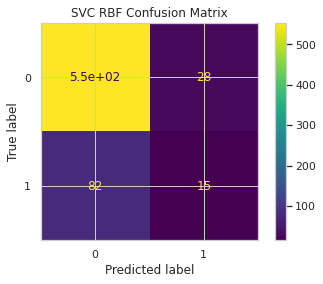

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       581
           1       0.35      0.15      0.21        97

    accuracy                           0.84       678
   macro avg       0.61      0.55      0.56       678
weighted avg       0.80      0.84      0.81       678



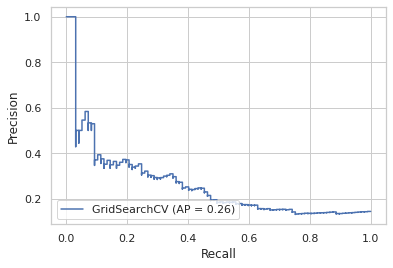

In [ ]:
# SVC w/ Radial Kernel
print('SVC-Radial')

# Define the model and fit it
params = {'C': [0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.0001,0.001,0.01,0.1,1]}
svc_rbf = SVC(kernel = 'rbf')
clf_svc_rbf = GridSearchCV(svc_rbf, params, scoring='recall').fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_svc_rbf.best_score_
print('Best parameters: {}'.format(clf_svc_rbf.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_svc_rbf.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_svc_rbf, X_test, y_test)
plt.title('SVC RBF Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_svc_rbf.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_svc_rbf.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'SVC_RBF', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_svc_rbf, X_test, y_test)

---
## Logistic Regression

Logistic Regression
Best parameters: {'C': 10}
Train CV score: 0.06761680869820746
Test Score: 0.041237113402061855


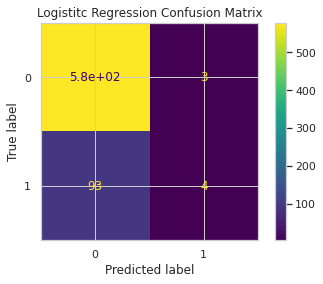

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.57      0.04      0.08        97

    accuracy                           0.86       678
   macro avg       0.72      0.52      0.50       678
weighted avg       0.82      0.86      0.80       678



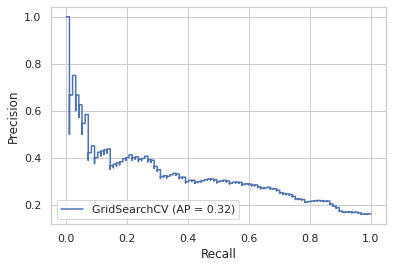

In [ ]:
# Logistic Regression
print('Logistic Regression')

# Define the model and fit it
params = {'C': [0.0001,0.001,0.01,0.1,1,10,100]}
log = LogisticRegression()
clf_log = GridSearchCV(log, params, scoring='recall').fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_log.best_score_
print('Best parameters: {}'.format(clf_log.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_log.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_log, X_test, y_test)
plt.title('Logistitc Regression Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_log.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_log.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'Log', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_log, X_test, y_test)

Logistic regression has the largest AP so far with $0.32$, however it comes with a model that was fit with the best recall value being $0.04$.

---
## CART

CART proved to have the greated recall score in the first part of the report.

CART
Train score: 1.0
Test Score: 0.2268041237113402


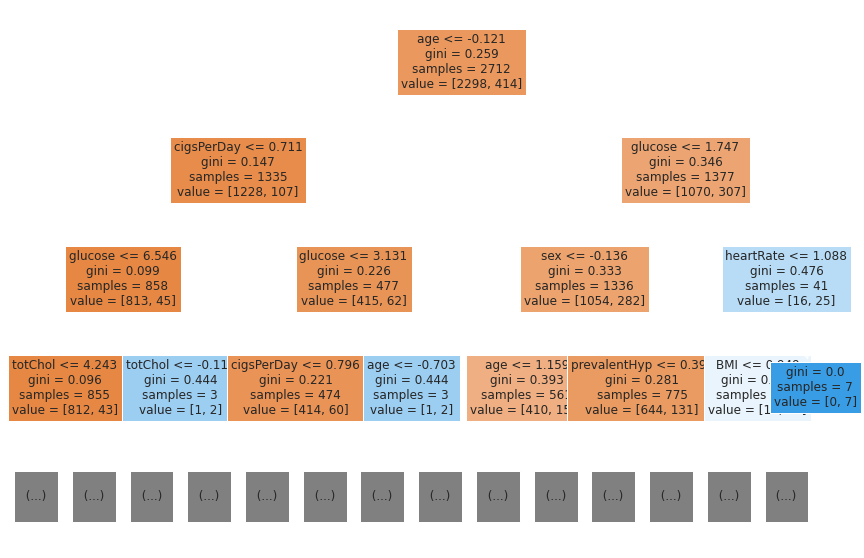

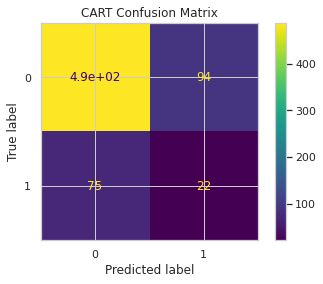

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       581
           1       0.19      0.23      0.21        97

    accuracy                           0.75       678
   macro avg       0.53      0.53      0.53       678
weighted avg       0.77      0.75      0.76       678



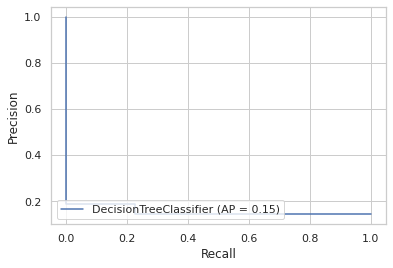

In [ ]:
# CART
print('CART')

# Define the model and fit it
clf_cart = DecisionTreeClassifier().fit(X_train, y_train)

# Display the resulting tree
plt.figure(figsize=(15,10))
plot_tree(clf_cart, max_depth=3, filled=True, fontsize=12, feature_names=X_scaled.columns)

# Display the results of the model fitting
train_score = recall_score(y_train, clf_cart.predict(X_train))
print('Train score: {}'.format(train_score))

# Test the model on the test data
test_score = recall_score(y_test, clf_cart.predict(X_test))
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_cart, X_test, y_test)
plt.title('CART Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_cart.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_cart.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'CART', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_cart, X_test, y_test)

---
## Random Forest

Random Forest
Best parameters: {'n_estimators': 1}
Train CV score: 0.20531883632089332
Test Score: 0.21649484536082475


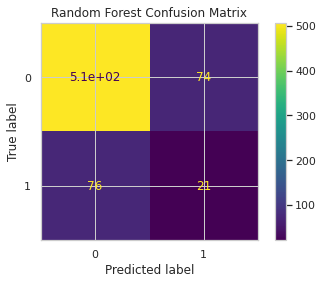

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       581
           1       0.22      0.22      0.22        97

    accuracy                           0.78       678
   macro avg       0.55      0.54      0.54       678
weighted avg       0.78      0.78      0.78       678



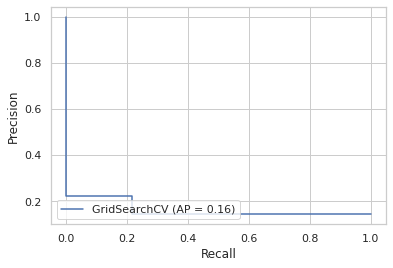

In [ ]:
# Random Forest
print('Random Forest')

# Define the model and fit it
params = {'n_estimators': [*range(1,100)]}
rf = RandomForestClassifier()
clf_RF = GridSearchCV(rf, params, scoring='recall').fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_RF.best_score_
print('Best parameters: {}'.format(clf_RF.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_RF.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_RF, X_test, y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_RF.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_RF.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'RF', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_RF, X_test, y_test)

---
## Neural Network

Neural Network
Train score: 0.15458937198067632
Test Score: 0.09278350515463918


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



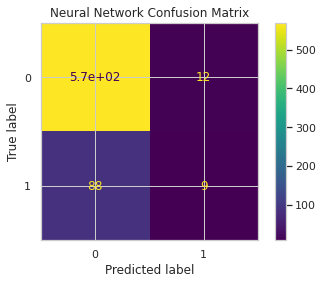

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       581
           1       0.43      0.09      0.15        97

    accuracy                           0.85       678
   macro avg       0.65      0.54      0.54       678
weighted avg       0.80      0.85      0.81       678



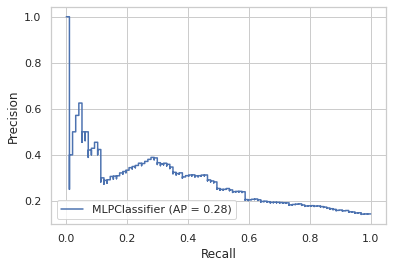

In [ ]:
# Neural Network
print('Neural Network')

# Define the model and fit it
clf_NN = MLPClassifier().fit(X_train, y_train)

# Display the results of the model fitting
train_score = recall_score(y_train, clf_NN.predict(X_train))
print('Train score: {}'.format(train_score))

# Test the model on the test data
test_score = recall_score(y_test, clf_NN.predict(X_test))
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_NN, X_test, y_test)
plt.title('Neural Network Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_NN.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_NN.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'NN', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_NN, X_test, y_test)

---
## AdaBoost

AdaBoost
Best parameters: {'n_estimators': 97}
Train CV score: 0.10620041140170437
Test Score: 0.07216494845360824


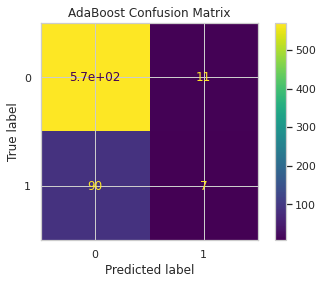

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       581
           1       0.39      0.07      0.12        97

    accuracy                           0.85       678
   macro avg       0.63      0.53      0.52       678
weighted avg       0.80      0.85      0.80       678



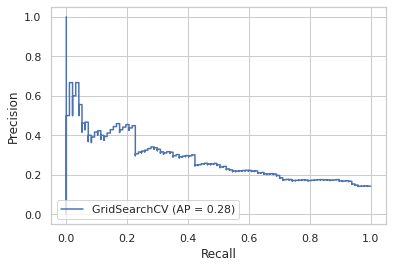

In [ ]:
# AdaBoost
print('AdaBoost')

# Define the model and fit it
params = {'n_estimators': [*range(1,100)]}
ada = AdaBoostClassifier()
clf_ada = GridSearchCV(ada, params, scoring = 'recall').fit(X_train, y_train)

# Display the results of the model fitting
train_score = clf_ada.best_score_
print('Best parameters: {}'.format(clf_ada.best_params_))
print('Train CV score: {}'.format(train_score))

# Test the model on the test data
test_score = clf_ada.score(X_test, y_test)
print('Test Score: {}'.format(test_score))

# Plot the confusion matrix
cm = plot_confusion_matrix(clf_ada, X_test, y_test)
plt.title('AdaBoost Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, clf_ada.predict(X_test), output_dict=False))
report = classification_report(y_test, clf_ada.predict(X_test), output_dict=True)
pos_precision = report['1']['precision']
pos_recall = report['1']['recall']

# Append the results to the table
recall_results = recall_results.append({'Model': 'Ada', 'Train Recall': train_score, 'Test Recall': test_score, 'Pos Precision': pos_precision, 'Pos Recall': pos_recall}, ignore_index = True)

# Plot precission vs. recall
fig = plot_precision_recall_curve(clf_ada, X_test, y_test)

In [ ]:
display(recall_results)

,Model,Train Recall,Test Recall,Pos Precision,Pos Recall
0,KNN,0.195416,0.237113,0.234694,0.237113
1,KNN 10,0.074879,0.030928,0.300000,0.030928
2,NB,0.140097,0.154639,0.394737,0.154639
3,SVC_RBF,0.132824,0.154639,0.348837,0.154639
4,Log,0.067617,0.041237,0.571429,0.041237
5,CART,1.000000,0.226804,0.189655,0.226804
6,RF,0.205319,0.216495,0.221053,0.216495
7,NN,0.154589,0.092784,0.428571,0.092784
8,Ada,0.106200,0.072165,0.388889,0.072165


In [ ]:
recall_results.to_csv('recall_results.csv')

There are no standout winners when it comes to recall scores. The best scores that we see from the recall-optimized models are around $25\%$. This comes at a significant loss in precission however. 

One last thing we can look at is how much precession each model has when the reacall is $1.0$.

In [ ]:
# List the models
models = [clf_knn, clf_NB, clf_log, clf_cart, clf_RF, clf_NN, clf_ada]
model_names = ['clf_knn', 'clf_NB', 'clf_log', 'clf_cart', 'clf_RF', 'clf_NN', 'clf_ada']

# Generate a results table
top_recall_results = pd.DataFrame(columns = ['Model', 'Precission', 'Recall', 'Threshold'])

# Iterate through the models and display the results from a recall of 1.0
for i, model in enumerate(models):
    p, r, t = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
    top_recall_results = top_recall_results.append({'Model': model_names[i], 'Precission': p[0], 'Recall': r[0], 'Threshold': t[0]}, ignore_index=True)

# Display the results
display(top_recall_results)

,Model,Precission,Recall,Threshold
0,clf_knn,0.143068,1.0,0.000000
1,clf_NB,0.163851,1.0,0.002145
2,clf_log,0.160596,1.0,0.043357
3,clf_cart,0.143068,1.0,0.000000
4,clf_RF,0.143068,1.0,0.000000
5,clf_NN,0.143279,1.0,0.004686
6,clf_ada,0.143068,1.0,0.327919


In [ ]:
top_recall_results.to_csv('top_recall_results.csv')

The model with the best precission when recall is $1.0$ is the Naive Bayes model. However, the threshold is $0.002$ which is $0.2\%$. This is a very low threshold and does not make much practical sense. This is roughly saying that if someone has a $0.2\%$ or greater chance of having CHD then classify them as such. I fell more comfortable with the results from the AdaBoost model or even the logistic regression models that have a higher threshold when classifying the points.